In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd# Import standard modules
import io
import urllib3

In [2]:
df = pd.read_csv("/content/Dushanbe_house.csv")
# get dataset demo
df.head()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000


In [3]:
# removing null values
df.dropna(axis=0, inplace=True)

# display null values if exist
df.isnull().sum()

Unnamed: 0         0
number_of_rooms    0
floor              0
area               0
latitude           0
longitude          0
price              0
dtype: int64

In [4]:
# importing the plotly module
import plotly.express as px

# plotting 3-d plot
fig = px.scatter_3d(df, x='number_of_rooms', y='area', z='price',
              color='price')
fig.show()

In [5]:
# taking the columns from the dataset
columns = df.columns

# storing the input and output variables
x = df[columns[1:4]]

#dependent variable
y = df[columns[-1]]


In [6]:
x.columns

Index(['number_of_rooms', 'floor', 'area'], dtype='object')

In [7]:
# importing the module
from sklearn.model_selection import train_test_split
# splitting into test data and traind data for ridge regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
X_train

,number_of_rooms,floor,area
3811,3,6,93.0
1439,2,6,72.0
858,3,5,68.0
3142,1,9,55.0
2661,3,15,111.0
...,...,...,...
1712,1,3,34.0
2010,3,4,68.0
1280,3,4,67.0
5249,3,3,70.0


In [9]:
from sklearn.linear_model import Ridge
# alpha parameter 0.9 and initializing ridge regression
model = Ridge(alpha=0.9)

# ridge function
model.fit(X_train, y_train)

# predictive models of ridge regression models
y_pred = model.predict(X_test)

In [10]:
# Importing the required module
from sklearn.metrics import r2_score


# Evaluating model performance
print('R-square score is :', r2_score(y_test, y_pred))

R-square score is : 0.3687775718497134


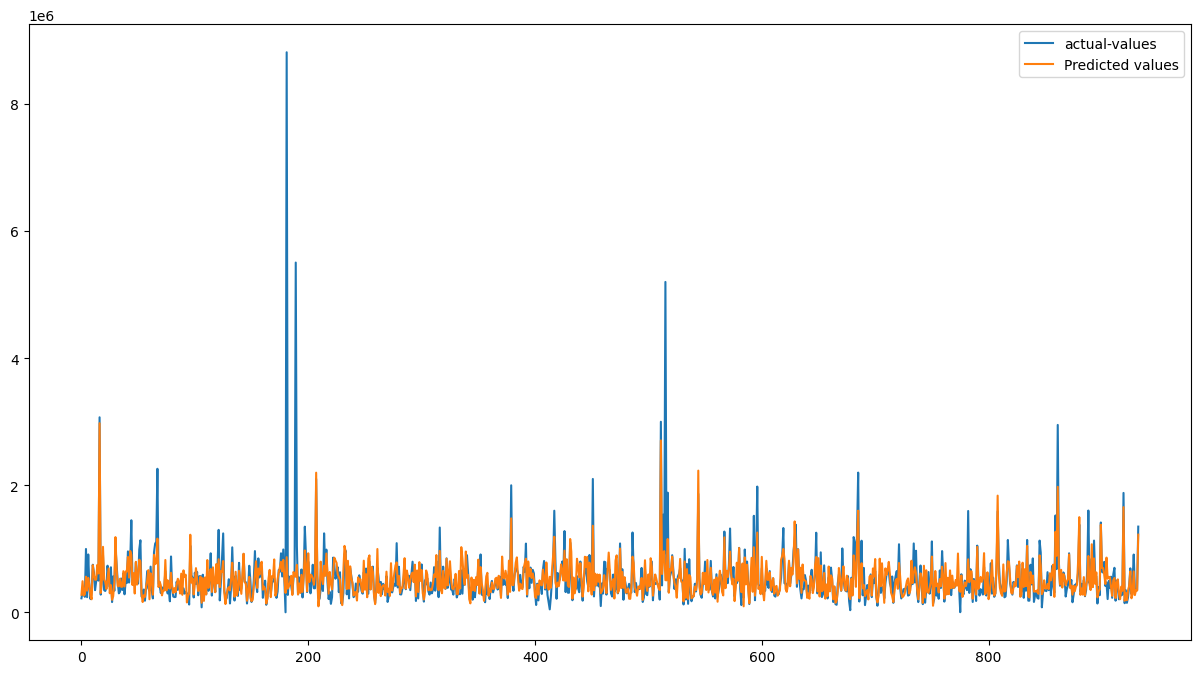

In [11]:
import matplotlib.pyplot as plt
# fitting the size of the plot
plt.figure(figsize=(15, 8))
# plotting the graphs for actual-value and predicted values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")
# showing the plotting of predictive modelling technique
plt.legend()
plt.show()

In [12]:
df

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000
5,5,3,4,53.0,38.530686,68.745261,513000
...,...,...,...,...,...,...,...
5558,5558,3,20,53.0,38.507768,68.768158,300000
5559,5559,1,14,55.0,38.550716,68.830547,380000
5560,5560,2,4,50.0,38.559888,68.794314,380000
5562,5562,2,5,96.0,38.530576,68.776302,720000


In [13]:
X_train

,number_of_rooms,floor,area
3811,3,6,93.0
1439,2,6,72.0
858,3,5,68.0
3142,1,9,55.0
2661,3,15,111.0
...,...,...,...
1712,1,3,34.0
2010,3,4,68.0
1280,3,4,67.0
5249,3,3,70.0


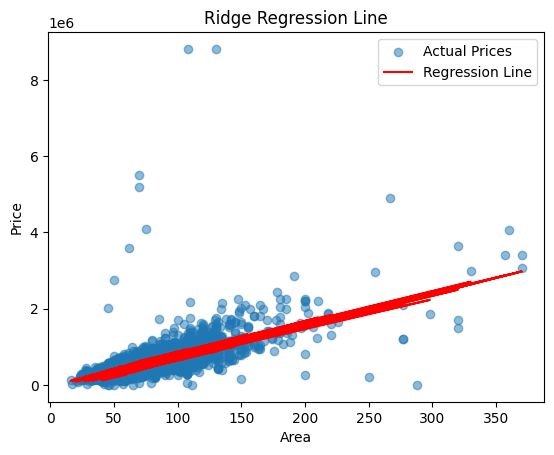

In [14]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and model is your trained ridge regression model
area_values = df['area']
predicted_prices = model.predict(df[['number_of_rooms', 'floor', 'area']])

# Scatter plot for actual values
plt.scatter(area_values, df['price'], label='Actual Prices', alpha=0.5)

# Plotting the regression line
plt.plot(area_values, predicted_prices, color='red', label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Ridge Regression Line')
plt.legend()
plt.show()


In [15]:
# lasso regression implementation
from sklearn.linear_model import Lasso
# lasso regression select initialization
lasso_model = Lasso(alpha=0.9)
# training the lasso regression model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.9)

In [16]:
# predictive model of lasso regression with test data
lasso_predictions = lasso_model.predict(X_test)


In [17]:
# Evaluating model performance to see accurate model
print('R-square score is :', r2_score(y_test, lasso_predictions))

R-square score is : 0.3687780007452811


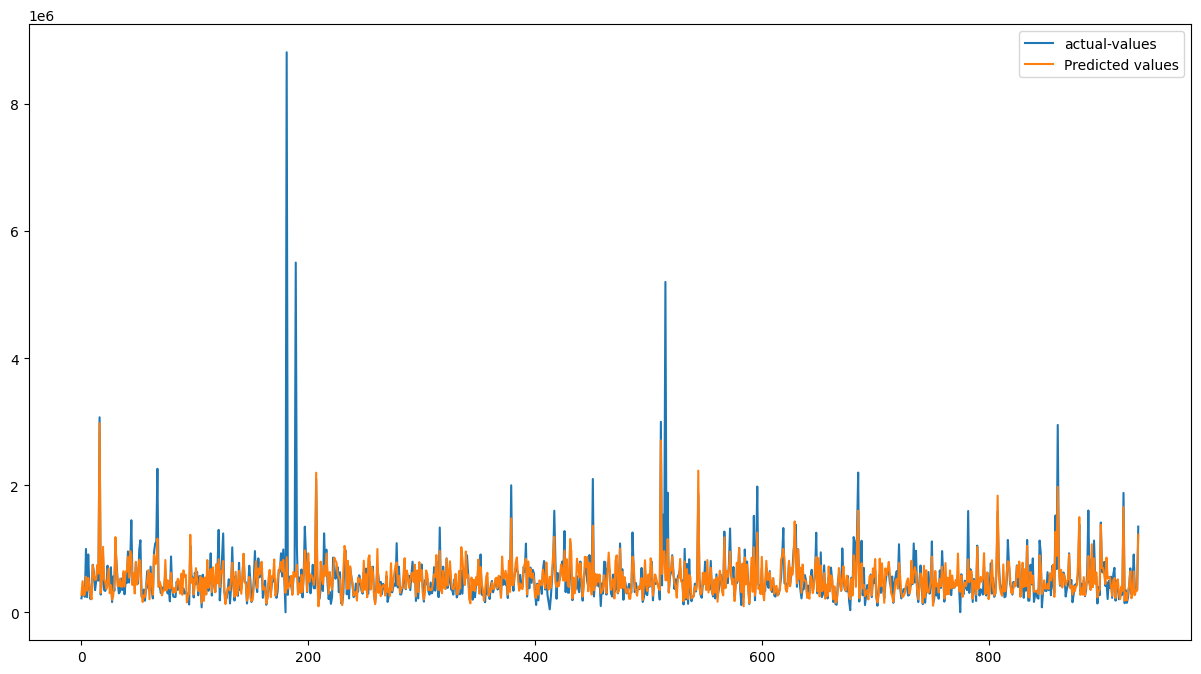

In [18]:
# fitting the size of the plot
plt.figure(figsize=(15, 8))
# plotting the graphs for observed value and real values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],lasso_predictions, label="Predicted values")
# showing the plotting of lasso regression
plt.legend()
plt.show()

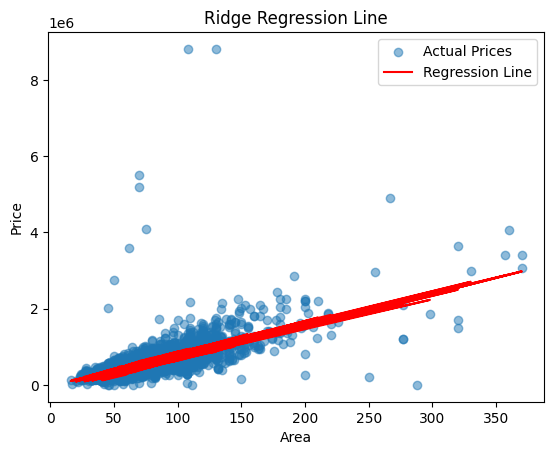

In [19]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and model is your trained ridge regression model
area_values = df['area']
predicted_prices = lasso_model.predict(df[['number_of_rooms', 'floor', 'area']])

# Scatter plot for actual values
plt.scatter(area_values, df['price'], label='Actual Prices', alpha=0.5)

# Plotting the regression line
plt.plot(area_values, predicted_prices, color='red', label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Ridge Regression Line')
plt.legend()
plt.show()


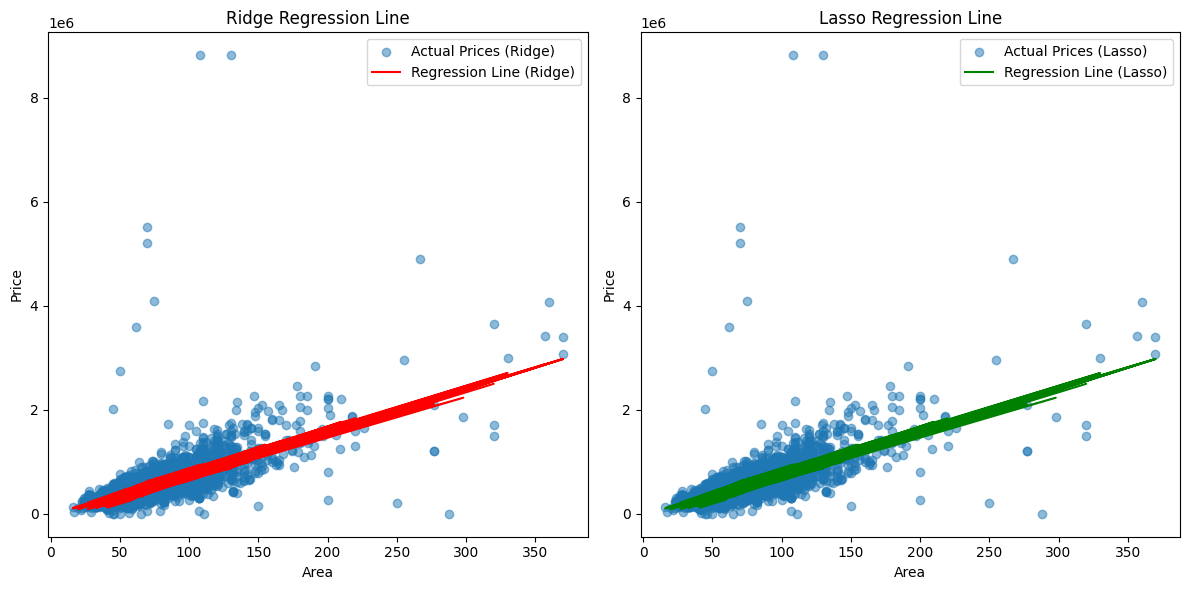

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and ridge_model is your trained ridge regression model
# Assuming df is your DataFrame and lasso_model is your trained lasso regression model

# Ridge Regression Visualization
area_values_ridge = df['area']
predicted_prices_ridge = model.predict(df[['number_of_rooms', 'floor', 'area']])

# Create the first subplot for Ridge Regression
plt.figure(figsize=(12, 6))

# Scatter plot for actual values (Ridge)
plt.subplot(1, 2, 1)
plt.scatter(area_values_ridge, df['price'], label='Actual Prices (Ridge)', alpha=0.5)

# Plotting the regression line (Ridge)
plt.plot(area_values_ridge, predicted_prices_ridge, color='red', label='Regression Line (Ridge)')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Ridge Regression Line')
plt.legend()

# Lasso Regression Visualization
area_values_lasso = df['area']
predicted_prices_lasso = lasso_model.predict(df[['number_of_rooms', 'floor', 'area']])

# Create the second subplot for Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(area_values_lasso, df['price'], label='Actual Prices (Lasso)', alpha=0.5)

# Plotting the regression line (Lasso)
plt.plot(area_values_lasso, predicted_prices_lasso, color='green', label='Regression Line (Lasso)')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Lasso Regression Line')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with the given data
# Make sure df contains the columns: 'number_of_rooms', 'floor', 'area', 'latitude', 'longitude', 'price'

# Selecting features (X) and target variable (y)
X = df[['number_of_rooms', 'floor', 'area']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Visualize the coefficients
coefficients = linear_model.coef_
print('Linear Regression Coefficients:', coefficients)


Mean Squared Error on Test Set: 177389785541.97952
Linear Regression Coefficients: [25708.21173833 -9220.36685786  8012.42523302]


In [26]:
print('R-square score is :', r2_score(y_test, y_pred))

R-square score is : 0.3198918190488752


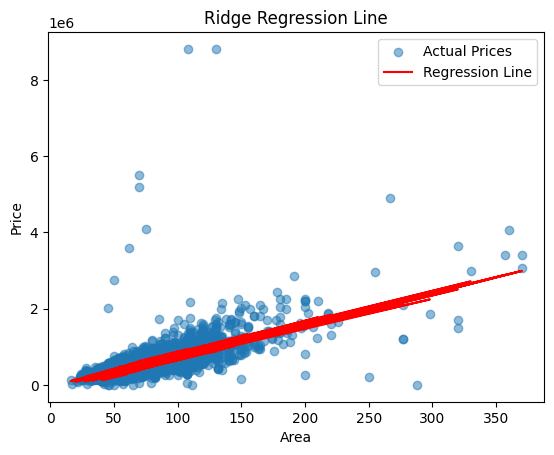

In [27]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and model is your trained ridge regression model
area_values = df['area']
predicted_prices = linear_model.predict(df[['number_of_rooms', 'floor', 'area']])

# Scatter plot for actual values
plt.scatter(area_values, df['price'], label='Actual Prices', alpha=0.5)

# Plotting the regression line
plt.plot(area_values, predicted_prices, color='red', label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Ridge Regression Line')
plt.legend()
plt.show()
